# AAAIM Evaluation Test

This notebook tests both single model evaluation and batch evaluation of multiple models.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
from pathlib import Path
import logging
import warnings
warnings.filterwarnings('ignore')

# Add the project root to the Python path
project_root = Path().absolute().parent
sys.path.insert(0, str(project_root))

# Import AAAIM functions
from core import annotate_model, curate_model
from core.database_search import force_clear_chromadb, get_species_recommendations_rag
from utils.evaluation import (
    evaluate_single_model,
    evaluate_models_in_folder,
    print_evaluation_results,
    compare_results,
    process_saved_llm_responses
)

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# LLM configuration
# llm_model = "Llama-4-Maverick-17B-128E-Instruct-FP8"
llm_model = "Llama-3.3-70B-Instruct"
# llm_model = "meta-llama/llama-3.3-70b-instruct:free"
# llm_model = "meta-llama/llama-3.3-70b-instruct"
# llm_model = "gpt-4.1-nano"

# Evaluation parameters
max_entities_per_model = 10  # Limit entities per model for testing
num_models_to_test = 5  # Number of models to test in batch evaluation

# Entity and database configuration
entity_type = "chemical"
database = "chebi"

output_dir = "./results/"  # Output directory for results

### Test function

In [3]:
# Test data - typical chemical species with synonyms
species_ids = ["glucose", "caffeine", "aspirin"]
synonyms_dict = {
    "glucose": ["glucose", "dextrose", "D-glucose"],
    "caffeine": ["caffeine", "1,3,7-trimethylxanthine"],
    "aspirin": ["aspirin", "acetylsalicylic acid", "ASA"]
}

print("Testing RAG-based entity linking...")
print("="*50)

try:
    # Test RAG approach
    rag_recommendations = get_species_recommendations_rag(
        species_ids=species_ids,
        synonyms_dict=synonyms_dict,
        model_type="default",
        top_k=3
    )
    
    for rec in rag_recommendations:
        print(f"\nSpecies: {rec.id}")
        print(f"Synonyms: {rec.synonyms}")
        print(f"Candidates: {rec.candidates}")
        print(f"Names: {rec.candidate_names}")
        print(f"Match scores (similarity): {rec.match_score}")
        
except Exception as e:
    print(f"RAG search failed: {e}")

Testing RAG-based entity linking...
INFO Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.
INFO Using sentence transformer all-MiniLM-L6-v2 model
INFO Load pretrained SentenceTransformer: all-MiniLM-L6-v2
INFO Using RAG embeddings from collection 'chebi_default_numonly' with default model


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Species: glucose
Synonyms: ['glucose', 'dextrose', 'D-glucose']
Candidates: ['4167', '42758', '17234']
Names: ['glucose', 'glucose', 'glucose']
Match scores (similarity): [1.0, 1.0, 1.0]

Species: caffeine
Synonyms: ['caffeine', '1,3,7-trimethylxanthine']
Candidates: ['27732', '17395', '18123']
Names: ['caffeine', 'caffeate', 'caffearine']
Match scores (similarity): [1.0, 0.745, 0.687]

Species: aspirin
Synonyms: ['aspirin', 'acetylsalicylic acid', 'ASA']
Candidates: ['15365', '182973', '233566']
Names: ['aspirin', 'no-aspirin', 'aspirin softam']
Match scores (similarity): [1.0, 0.856, 0.716]


## Annotating a new model with no or few existing annotations

In [3]:
test_model_file = "190_few_anno.xml"
# Check if test model exists
if os.path.exists(test_model_file):
    print(f"✓ Test model found: {test_model_file}")
else:
    print(f"✗ Test model not found: {test_model_file}")

✓ Test model found: 190_few_anno.xml


In [4]:
# Test with a single model
recommendations_df, metrics = annotate_model(
    model_file=test_model_file,
    llm_model=llm_model,
    method="rag",
    max_entities=max_entities_per_model,
    entity_type=entity_type,
    database=database
)

INFO Starting annotation for model: 190_few_anno.xml
INFO Using LLM model: Llama-4-Maverick-17B-128E-Instruct-FP8
INFO Using method: rag for database search
INFO Entity type: chemical, Database: chebi
INFO >>>Step 1: Getting species from model...<<<
INFO Found 11 species in model
INFO Found 2 entities with existing annotations
INFO Selected 10 entities for annotation
INFO >>>Step 2: Extracting model context...<<<
INFO Extracted context for model: Rodriguez-Caso2006_Polyamine_Metabolism
INFO >>>Step 3: Querying LLM (Llama-4-Maverick-17B-128E-Instruct-FP8)...<<<
INFO HTTP Request: POST https://api.llama.com/compat/v1/chat/completions "HTTP/1.1 200 OK"
INFO LLM response received in 1.90s
INFO Parsed synonyms for 10 entities
INFO >>>Step 4: Searching chebi database...<<<


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO Database search completed in 0.34s
INFO >>>Step 5: Generating recommendation table...<<<
INFO Annotation completed in 2.34s
INFO Generated 30 recommendations


In [5]:
recommendations_df

,file,type,id,display_name,annotation,annotation_label,match_score,existing,update_annotation
0,190_few_anno.xml,chemical,SAM,S-adenosyl-L-methionine,CHEBI:15414,s-adenosyl-l-methionine,1.000,1,keep
1,190_few_anno.xml,chemical,SAM,S-adenosyl-L-methionine,CHEBI:59789,s-adenosyl-l-methionine,1.000,0,ignore
2,190_few_anno.xml,chemical,SAM,S-adenosyl-L-methionine,CHEBI:67040,(s)-s-adenosyl-l-methionine,1.000,0,ignore
3,190_few_anno.xml,chemical,A,S-adenosylmethioninamine,CHEBI:15625,s-adenosylmethioninamine,1.000,1,keep
4,190_few_anno.xml,chemical,A,S-adenosylmethioninamine,CHEBI:33442,s-adenosylmethionine,0.926,0,ignore
5,190_few_anno.xml,chemical,A,S-adenosylmethioninamine,CHEBI:15414,s-adenosylmethionine,0.926,0,ignore
6,190_few_anno.xml,chemical,P,Putrescine,CHEBI:17148,putrescine,1.000,0,add
7,190_few_anno.xml,chemical,P,Putrescine,CHEBI:326268,putrescine,1.000,0,ignore
8,190_few_anno.xml,chemical,P,Putrescine,CHEBI:26406,putrescines,0.912,0,ignore
9,190_few_anno.xml,chemical,S,Spermine,CHEBI:15746,spermine,1.000,0,add


In [6]:
metrics

{'total_entities': 11,
 'entities_with_predictions': 10,
 'annotation_rate': 0.9090909090909091,
 'total_predictions': 50,
 'matches': 2,
 'accuracy': 1.0,
 'total_time': 4.194497108459473,
 'llm_time': 3.3385448455810547,
 'search_time': 0.7138900756835938}

## Curate a model with existing annotations

Evaluation of a single model with existing annotations. 
Will only look at the species with existing annotations.

In [4]:
test_model_file = "test_models/BIOMD0000000190.xml"
# Check if test model exists
if os.path.exists(test_model_file):
    print(f"✓ Test model found: {test_model_file}")
else:
    print(f"✗ Test model not found: {test_model_file}")

✓ Test model found: test_models/BIOMD0000000190.xml


In [5]:
# Test with a single model
recommendations_df, metrics = curate_model(
    model_file=test_model_file,
    llm_model=llm_model,
    method="rag",
    max_entities=max_entities_per_model,
    entity_type=entity_type,
    database=database
)

INFO Starting curation for model: test_models/BIOMD0000000190.xml
INFO Using LLM model: Llama-3.3-70B-Instruct
INFO Using method: rag for database search
INFO Entity type: chemical, Database: chebi
INFO >>>Step 1: Finding existing annotations...<<<
INFO Found 11 entities with existing annotations
INFO Selected 10 entities for curation
INFO >>>Step 2: Extracting model context...<<<
INFO Extracted context for model: Rodriguez-Caso2006_Polyamine_Metabolism
INFO >>>Step 3: Querying LLM ({llm_model})...<<<
INFO HTTP Request: POST https://api.llama.com/compat/v1/chat/completions "HTTP/1.1 200 OK"
INFO LLM response received in 3.76s
INFO Parsed synonyms for 10 entities
INFO >>>Step 4: Searching chebi database...<<<


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO Database search completed in 0.58s
INFO >>>Step 5: Generating recommendation table...<<<
INFO Curation completed in 4.46s
INFO Generated 32 recommendations


In [6]:
metrics

{'total_entities': 11,
 'entities_with_predictions': 11,
 'annotation_rate': 1.0,
 'total_predictions': 32,
 'matches': 11,
 'accuracy': 1.0,
 'total_time': 4.462100028991699,
 'llm_time': 3.755760908126831,
 'search_time': 0.5756800174713135}

In [7]:
recommendations_df

,file,type,id,display_name,annotation,annotation_label,match_score,existing,update_annotation
0,BIOMD0000000190.xml,chemical,SAM,S-adenosyl-L-methionine,CHEBI:15414,s-adenosylmethionine,1.000,1,keep
1,BIOMD0000000190.xml,chemical,SAM,S-adenosyl-L-methionine,CHEBI:67040,s-adenosylmethionine,1.000,0,ignore
2,BIOMD0000000190.xml,chemical,SAM,S-adenosyl-L-methionine,CHEBI:33442,s-adenosylmethionine,1.000,0,ignore
3,BIOMD0000000190.xml,chemical,A,S-adenosylmethioninamine,CHEBI:15625,s-adenosylmethioninamine,1.000,1,keep
4,BIOMD0000000190.xml,chemical,A,S-adenosylmethioninamine,CHEBI:33442,s-adenosylmethionine,0.926,0,ignore
5,BIOMD0000000190.xml,chemical,A,S-adenosylmethioninamine,CHEBI:15414,s-adenosylmethionine,0.926,0,ignore
6,BIOMD0000000190.xml,chemical,P,Putrescine,CHEBI:17148,putrescine,1.000,1,keep
7,BIOMD0000000190.xml,chemical,P,Putrescine,CHEBI:326268,putrescine,1.000,0,ignore
8,BIOMD0000000190.xml,chemical,P,Putrescine,CHEBI:26406,putrescines,0.912,0,ignore
9,BIOMD0000000190.xml,chemical,S,Spermine,CHEBI:15746,spermine,1.000,1,keep


## Test 1: Single Model Evaluation

Evaluation of a single model with existing annotations.

In [ ]:
# Test using utils evaluation function
test_model_file = "/Users/luna/Desktop/CRBM/AMAS_proj/Models/BioModels/BIOMD0000001046.xml"
result_df = evaluate_single_model(
    model_file=test_model_file,
    llm_model=llm_model,
    method = 'rag',
    top_k = 3,
    # max_entities=max_entities_per_model,
    entity_type=entity_type,
    database=database,
    save_llm_results=False,
    verbose=True
)

In [7]:
result_df

,model,species_id,display_name,synonyms_LLM,reason,exist_annotation_id,exist_annotation_name,predictions,predictions_names,match_score,recall_formula,precision_formula,recall_exact,precision_exact,accuracy,total_time,llm_time,query_time,tax_id,tax_name
0,BIOMD0000000013.xml,x_CO2,,"[carbon dioxide, CO2]","The model is related to the Calvin cycle, and ...",[16526],carbon dioxide,"[16526, 29325, 48828]","[carbon dioxide, oxidooxomethyl, cobalt(2+)]","[1.0, 0.81, 0.803]",1.0,0.5,1.0,0.333,1,3.284574,2.611668,0.672906,None,None
1,BIOMD0000000013.xml,ATP_ch,,"[adenosine triphosphate, ATP]","The model is related to the Calvin cycle, and ...",[15422],ATP,"[15422, 30616, 62910]","[ATP, ATP(4-), ethyl-ATP]","[1.0, 1.0, 0.865]",1.0,0.5,1.0,0.333,1,3.284574,2.611668,0.672906,None,None
2,BIOMD0000000013.xml,x_NADPH_ch,,"[NADPH, nicotinamide adenine dinucleotide phos...","The model is related to the Calvin cycle, and ...",[16474],NADPH,"[16474, 57783, 18009]","[NADPH, NADPH(4-), NADP(+)]","[1.0, 1.0, 1.0]",1.0,1.0,1.0,0.333,1,3.284574,2.611668,0.672906,None,None
3,BIOMD0000000013.xml,GAP_ch,,"[glyceraldehyde 3-phosphate, G3P]","The model is related to the Calvin cycle, and ...",[17138],glyceraldehyde 3-phosphate,"[29052, 17138, 58027]","[D-glyceraldehyde 3-phosphate, glyceraldehyde ...","[1.0, 1.0, 1.0]",1.0,1.0,1.0,0.333,1,3.284574,2.611668,0.672906,None,None
4,BIOMD0000000013.xml,Pi_ch,,"[phosphate, inorganic phosphate]","The model is related to the Calvin cycle, and ...",[18367],phosphate(3-),"[26078, 35780, 43474]","[phosphoric acid, phosphate ion, hydrogenphosp...","[1.0, 1.0, 1.0]",1.0,1.0,0.0,0.000,1,3.284574,2.611668,0.672906,None,None
5,BIOMD0000000013.xml,DHAP_ch,,"[dihydroxyacetone phosphate, DHAP]","The model is related to the Calvin cycle, and ...",[16108],dihydroxyacetone phosphate,"[16108, 57642, 172550]","[dihydroxyacetone phosphate, glycerone phospha...","[1.0, 1.0, 0.682]",1.0,0.5,1.0,0.333,1,3.284574,2.611668,0.672906,None,None
6,BIOMD0000000013.xml,FBP_ch,,"[fructose 1,6-bisphosphate, FBP]","The model is related to the Calvin cycle, and ...",[28013],"beta-D-fructofuranose 1,6-bisphosphate","[16905, 78682, 49299]","[keto-D-fructose 1,6-bisphosphate, D-fructose ...","[0.881, 0.881, 0.881]",1.0,1.0,0.0,0.000,1,3.284574,2.611668,0.672906,None,None
7,BIOMD0000000013.xml,F6P_ch,,"[fructose 6-phosphate, F6P]","The model is related to the Calvin cycle, and ...",[57634],beta-D-fructofuranose 6-phosphate(2-),"[88003, 16084, 15946]","[fructose 6-phosphate, beta-D-fructofuranose 6...","[1.0, 0.987, 0.987]",1.0,1.0,0.0,0.000,1,3.284574,2.611668,0.672906,None,None
8,BIOMD0000000013.xml,E4P_ch,,"[erythrose 4-phosphate, E4P]","The model is related to the Calvin cycle, and ...",[48153],D-erythrose 4-phosphate,"[4116, 23956, 16897]","[D-erythrulose 4-phosphate, erythrose phosphat...","[0.846, 0.829, 0.784]",1.0,1.0,0.0,0.000,1,3.284574,2.611668,0.672906,None,None
9,BIOMD0000000013.xml,X5P_ch,,"[xylulose 5-phosphate, X5P]","The model is related to the Calvin cycle, and ...",[16332],D-xylulose 5-phosphate,"[27354, 16593, 194485]","[xylulose 5-phosphate, L-xylulose 5-phosphate,...","[1.0, 0.866, 0.435]",1.0,0.5,0.0,0.000,1,3.284574,2.611668,0.672906,None,None


## Test 2: Batch Model Evaluation

Test the evaluation of multiple models in a directory.

In [2]:
model_dir = "/Users/luna/Desktop/CRBM/AMAS_proj/Models/BioModels"
# model_dir = "test_models"
# Check if model directory exists
if os.path.exists(model_dir):
    model_files = [f for f in os.listdir(model_dir) if f.endswith('.xml')]
    print(f"✓ Model directory found: {model_dir}")
    print(f"  - Found {len(model_files)} XML files")
    # print(f"  - Will test first {min(num_models_to_test, len(model_files))} models")

✓ Model directory found: /Users/luna/Desktop/CRBM/AMAS_proj/Models/BioModels
  - Found 1063 XML files


In [3]:
# Run batch evaluation 
batch_results_df = evaluate_models_in_folder(
    model_dir=model_dir,
    llm_model=llm_model,
    method="rag",
    top_k=3,
    entity_type=entity_type,
    database=database,
    save_llm_results=True,
    output_dir=output_dir,
    output_file="biomd_chebi_rag_llama-3_top3_general_prompt.csv",
    start_at=1,
    verbose=False
)

LLM results will be saved to: ./results/Llama-3.3-70B-instruct-Meta/chemical/20250713_1507
Evaluating 1/1063: BIOMD0000000001.xml
WARNING Skipping BIOMD0000000001.xml - no results generated
Evaluating 2/1063: BIOMD0000000002.xml
LLM results saved to: results/Llama-3.3-70B-instruct-Meta/chemical/20250713_1507/BIOMD0000000002.txt
Evaluating 3/1063: BIOMD0000000003.xml
WARNING Skipping BIOMD0000000003.xml - no results generated
Evaluating 4/1063: BIOMD0000000004.xml
WARNING Skipping BIOMD0000000004.xml - no results generated
Evaluating 5/1063: BIOMD0000000005.xml
WARNING Skipping BIOMD0000000005.xml - no results generated
Evaluating 6/1063: BIOMD0000000006.xml
WARNING Skipping BIOMD0000000006.xml - no results generated
Evaluating 7/1063: BIOMD0000000007.xml
WARNING Skipping BIOMD0000000007.xml - no results generated
Evaluating 8/1063: BIOMD0000000008.xml
WARNING Skipping BIOMD0000000008.xml - no results generated
Evaluating 9/1063: BIOMD0000000009.xml
WARNING Skipping BIOMD0000000009.xml 

In [5]:
# Run batch evaluation 
batch_results_df = evaluate_models_in_folder(
    model_dir=model_dir,
    llm_model="Llama-4-Maverick-17B-128E-Instruct-FP8",
    method="rag",
    top_k=3,
    entity_type=entity_type,
    database=database,
    save_llm_results=True,
    output_dir=output_dir,
    output_file="biomd_chebi_rag_llama-4_top3_general_prompt.csv",
    start_at=1,
    verbose=False
)

LLM results will be saved to: ./results/llama-4-maverick-17b-128e-instruct-fp8/chemical/20250713_1612
Evaluating 1/1063: BIOMD0000000001.xml
WARNING Skipping BIOMD0000000001.xml - no results generated
Evaluating 2/1063: BIOMD0000000002.xml
LLM results saved to: results/llama-4-maverick-17b-128e-instruct-fp8/chemical/20250713_1612/BIOMD0000000002.txt
Evaluating 3/1063: BIOMD0000000003.xml
WARNING Skipping BIOMD0000000003.xml - no results generated
Evaluating 4/1063: BIOMD0000000004.xml
WARNING Skipping BIOMD0000000004.xml - no results generated
Evaluating 5/1063: BIOMD0000000005.xml
WARNING Skipping BIOMD0000000005.xml - no results generated
Evaluating 6/1063: BIOMD0000000006.xml
WARNING Skipping BIOMD0000000006.xml - no results generated
Evaluating 7/1063: BIOMD0000000007.xml
WARNING Skipping BIOMD0000000007.xml - no results generated
Evaluating 8/1063: BIOMD0000000008.xml
WARNING Skipping BIOMD0000000008.xml - no results generated
Evaluating 9/1063: BIOMD0000000009.xml
WARNING Skippin

In [12]:
# Run batch evaluation 
batch_results_df = evaluate_models_in_folder(
    model_dir=model_dir,
    llm_model="Llama-3.3-70B-Instruct",
    method="rag",
    top_k=10,
    entity_type=entity_type,
    database=database,
    save_llm_results=True,
    output_dir=output_dir,
    output_file="biomd_chebi_rag_llama-3_top10_prompt_adjusted.csv",
    start_at=1,
    verbose=False
)

LLM results will be saved to: ./results/Llama-3.3-70B-instruct-Meta/chemical/20250710_0145
Evaluating 1/1063: BIOMD0000000001.xml


WARNING Skipping BIOMD0000000001.xml - no results generated
Evaluating 2/1063: BIOMD0000000002.xml
LLM results saved to: results/Llama-3.3-70B-instruct-Meta/chemical/20250710_0145/BIOMD0000000002.txt
Evaluating 3/1063: BIOMD0000000003.xml
WARNING Skipping BIOMD0000000003.xml - no results generated
Evaluating 4/1063: BIOMD0000000004.xml
WARNING Skipping BIOMD0000000004.xml - no results generated
Evaluating 5/1063: BIOMD0000000005.xml
WARNING Skipping BIOMD0000000005.xml - no results generated
Evaluating 6/1063: BIOMD0000000006.xml
WARNING Skipping BIOMD0000000006.xml - no results generated
Evaluating 7/1063: BIOMD0000000007.xml
WARNING Skipping BIOMD0000000007.xml - no results generated
Evaluating 8/1063: BIOMD0000000008.xml
WARNING Skipping BIOMD0000000008.xml - no results generated
Evaluating 9/1063: BIOMD0000000009.xml
WARNING Skipping BIOMD0000000009.xml - no results generated
Evaluating 10/1063: BIOMD0000000010.xml
WARNING Skipping BIOMD0000000010.xml - no results generated
Evaluat

In [9]:
# Run batch evaluation 
batch_results_df = evaluate_models_in_folder(
    model_dir=model_dir,
    llm_model=llm_model,
    method="rag",
    top_k=1,
    entity_type=entity_type,
    database=database,
    save_llm_results=True,
    output_dir=output_dir,
    output_file="biomd_chebi_rag_llama-4_top1_prompt_adjusted.csv",
    start_at=1,
    verbose=False
)

LLM results will be saved to: ./results/llama-4-maverick-17b-128e-instruct-fp8/chemical/20250709_2109
Evaluating 1/1063: BIOMD0000000001.xml
WARNING Skipping BIOMD0000000001.xml - no results generated
Evaluating 2/1063: BIOMD0000000002.xml
LLM results saved to: results/llama-4-maverick-17b-128e-instruct-fp8/chemical/20250709_2109/BIOMD0000000002.txt
Evaluating 3/1063: BIOMD0000000003.xml
WARNING Skipping BIOMD0000000003.xml - no results generated
Evaluating 4/1063: BIOMD0000000004.xml
WARNING Skipping BIOMD0000000004.xml - no results generated
Evaluating 5/1063: BIOMD0000000005.xml
WARNING Skipping BIOMD0000000005.xml - no results generated
Evaluating 6/1063: BIOMD0000000006.xml
WARNING Skipping BIOMD0000000006.xml - no results generated
Evaluating 7/1063: BIOMD0000000007.xml
WARNING Skipping BIOMD0000000007.xml - no results generated
Evaluating 8/1063: BIOMD0000000008.xml
WARNING Skipping BIOMD0000000008.xml - no results generated
Evaluating 9/1063: BIOMD0000000009.xml
WARNING Skippin

## Test 3: Evaluating previous LLM sysnonyms

In [7]:
results_df = process_saved_llm_responses(response_folder = '/Users/luna/Desktop/CRBM/AMAS_proj/AAAIM/tests/results/Llama-3.3-70B-instruct-Meta/chemical_prompt_adjusted', 
                               model_dir = '/Users/luna/Desktop/CRBM/AMAS_proj/Models/BioModels', 
                               prev_results_csv = 'results/biomd_chebi_rag_meta-llama_top3_prompt_adjusted.csv', 
                               method = "direct",
                               output_dir = './results/', 
                               output_file = 'biomd_chebi_rag_meta-llama_top1_prompt_adjusted.csv',
                               top_k = 1,
                               verbose = False)

Processing 1/340: BIOMD0000000291.txt
Processing 2/340: BIOMD0000000246.txt
Processing 3/340: BIOMD0000000508.txt
Processing 4/340: BIOMD0000000087.txt
Processing 5/340: BIOMD0000000736.txt
Processing 6/340: BIOMD0000000050.txt
Processing 7/340: BIOMD0000000044.txt
Processing 8/340: BIOMD0000000859.txt
Processing 9/340: BIOMD0000000642.txt
Processing 10/340: BIOMD0000000124.txt
Processing 11/340: BIOMD0000000497.txt
Processing 12/340: BIOMD0000000326.txt
Processing 13/340: BIOMD0000000468.txt
Processing 14/340: BIOMD0000000469.txt
Processing 15/340: BIOMD0000001005.txt
Processing 16/340: BIOMD0000000327.txt
Processing 17/340: BIOMD0000000496.txt
Processing 18/340: BIOMD0000000482.txt
Processing 19/340: BIOMD0000000119.txt
Processing 20/340: BIOMD0000000858.txt
Processing 21/340: BIOMD0000000045.txt
Processing 22/340: BIOMD0000000737.txt
Processing 23/340: BIOMD0000000051.txt
Processing 24/340: BIOMD0000000086.txt
Processing 25/340: BIOMD0000000509.txt
Processing 26/340: BIOMD0000000521

In [ ]:
results_df = process_saved_llm_responses(response_folder = '/Users/luna/Desktop/CRBM/AMAS_proj/AAAIM/tests/results/llama-4-maverick-17b-128e-instruct-fp8/chemical_prompt_adjusted', 
                               model_dir = '/Users/luna/Desktop/CRBM/AMAS_proj/Models/BioModels', 
                               prev_results_csv = 'results/biomd_chebi_rag_llama-4_top3_prompt_adjusted.csv', 
                               method = "rag",
                               output_dir = './results/', 
                               output_file = 'biomd_chebi_rag_llama-4_top3_prompt_adjusted_rerun.csv',
                               top_k = 3,
                               verbose = False)

## Statistics

In [6]:
print_evaluation_results("results/biomd_chebi_rag_llama-4_top3_general_prompt.csv")

Filtered results to 9650 entries that exist in reference: /Users/luna/Desktop/CRBM/AMAS_proj/Results/biomd_species_accuracy_AMAS.csv
Number of models assessed: 315
Number of models with predictions: 315
Number of annotations evaluated: 9650
Average accuracy (per model): 0.88
Ave. recall (formula): 0.88
Ave. precision (formula): 0.67
Ave. recall (exact): 0.73
Ave. precision (exact): 0.25
Average accuracy (per species): 0.40
Ave. recall (formula, per species): 0.39
Ave. precision (formula, per species): 0.29
Ave. recall (exact, per species): 0.28
Ave. precision (exact, per species): 0.13
Ave. total time (per model): 9.63
Ave. total time (per element, per model): 0.31
Ave. LLM time (per model): 9.12
Ave. LLM time (per element, per model): 0.30
Average number of predictions per species: 2.87


In [15]:
print_evaluation_results("results/biomd_chebi_rag_llama-4_top10_prompt_adjusted.csv")

Filtered results to 9650 entries that exist in reference: /Users/luna/Desktop/CRBM/AMAS_proj/Results/biomd_species_accuracy_AMAS.csv
Number of models assessed: 315
Number of models with predictions: 313
Number of annotations evaluated: 9650
Average accuracy (per model): 0.88
Ave. recall (formula): 0.88
Ave. precision (formula): 0.22
Ave. recall (exact): 0.83
Ave. precision (exact): 0.09
Average accuracy (per species): 0.42
Ave. recall (formula, per species): 0.42
Ave. precision (formula, per species): 0.11
Ave. recall (exact, per species): 0.33
Ave. precision (exact, per species): 0.05
Ave. total time (per model): 10.54
Ave. total time (per element, per model): 0.34
Ave. LLM time (per model): 10.05
Ave. LLM time (per element, per model): 0.33
Average number of predictions per species: 9.27


In [12]:
print_evaluation_results("results/biomd_chebi_rag_llama-3_top3_prompt_adjusted.csv")

Filtered results to 4922 entries that exist in reference: /Users/luna/Desktop/CRBM/AMAS_proj/Results/biomd_species_accuracy_AMAS.csv
Number of models assessed: 311
Number of models with predictions: 310
Number of annotations evaluated: 4922
Average accuracy (per model): 0.88
Ave. recall (formula): 0.88
Ave. precision (formula): 0.67
Ave. recall (exact): 0.74
Ave. precision (exact): 0.25
Average accuracy (per species): 0.69
Ave. recall (formula, per species): 0.68
Ave. precision (formula, per species): 0.51
Ave. recall (exact, per species): 0.56
Ave. precision (exact, per species): 0.19
Ave. total time (per model): 4.30
Ave. total time (per element, per model): 0.27
Ave. LLM time (per model): 3.91
Ave. LLM time (per element, per model): 0.25
Average number of predictions per species: 2.91


In [11]:
print_evaluation_results("results/biomd_chebi_rag_meta-llama_top3_prompt_adjusted.csv")

Filtered results to 9650 entries that exist in reference: /Users/luna/Desktop/CRBM/AMAS_proj/Results/biomd_species_accuracy_AMAS.csv
Number of models assessed: 315
Number of models with predictions: 313
Number of annotations evaluated: 9650
Average accuracy (per model): 0.87
Ave. recall (formula): 0.87
Ave. precision (formula): 0.66
Ave. recall (exact): 0.73
Ave. precision (exact): 0.25
Average accuracy (per species): 0.40
Ave. recall (formula, per species): 0.40
Ave. precision (formula, per species): 0.29
Ave. recall (exact, per species): 0.29
Ave. precision (exact, per species): 0.12
Ave. total time (per model): 5.04
Ave. total time (per element, per model): 0.16
Ave. LLM time (per model): 4.53
Ave. LLM time (per element, per model): 0.15
Average number of predictions per species: 2.88


In [4]:
compare_results(
    'results/biomd_chebi_rag_meta-llama_top1_prompt_adjusted.csv',
    'results/biomd_chebi_rag_meta-llama_top3_prompt_adjusted.csv',
    'results/biomd_chebi_rag_meta-llama_top5_prompt_adjusted.csv',
    'results/biomd_chebi_rag_meta-llama_top10_prompt_adjusted.csv',
    'results/biomd_chebi_rag_llama-4_top3_prompt_adjusted.csv',
    'results/biomd_chebi_rag_llama-4_top10_prompt_adjusted.csv',
    'results/biomd_chebi_direct_llama-4_top3_prompt_adjusted.csv'
)

Filtered all results to only include entries that exist in reference: /Users/luna/Desktop/CRBM/AMAS_proj/Results/biomd_species_accuracy_AMAS.csv
COMPARISON OF RESULTS

RESULTS FOR: results/biomd_chebi_rag_meta-llama_top1_prompt_adjusted.csv
Number of models assessed: 313
Number of models with predictions: 313
Number of species tested: 1726
Average accuracy (per model): 0.76
Average accuracy (per species): 0.79
Average recall (formula) (per model): 0.76
Average precision (formula) (per model): 0.76
Average recall (exact) (per model): 0.45
Average recall (exact) (per species): 0.39
Average precision (exact) (per model): 0.45
Average precision (exact) (per species): 0.39
Ave. total time (per model): 4.67
Ave. total time (per element, per model): 0.40
Ave. LLM time (per model): 4.35
Ave. LLM time (per element, per model): 0.38
Average number of predictions per species: 1.00

RESULTS FOR: results/biomd_chebi_rag_meta-llama_top3_prompt_adjusted.csv
Number of models assessed: 315
Number of mo

In [4]:
print_evaluation_results("results/biomd_chebi_rag_llama-4_top3_prompt_adjusted.csv")

Number of models assessed: 340
Number of models with predictions: 338
Average accuracy (per model): 0.79
Ave. recall (formula): 0.78
Ave. precision (formula): 0.59
Ave. recall (exact): 0.68
Ave. precision (exact): 0.24
Average accuracy (per species): 0.40
Ave. recall (formula, per species): 0.39
Ave. precision (formula, per species): 0.28
Ave. recall (exact, per species): 0.28
Ave. precision (exact, per species): 0.13
Ave. total time (per model): 10.16
Ave. total time (per element, per model): 0.32
Ave. LLM time (per model): 9.77
Ave. LLM time (per element, per model): 0.31
Average number of predictions per species: 2.84


In [7]:
df1 = pd.read_csv('results/biomd_chebi_rag_llama-4_top3_repeat2.csv')
df2 = pd.read_csv('results/biomd_chebi_rag_llama-4_top3_repeat2_rerun.csv')

# Merge on model and species_id, suffixing accuracy columns
merged = pd.merge(
    df1[['model', 'species_id', 'accuracy']],
    df2[['model', 'species_id', 'accuracy']],
    on=['model', 'species_id'],
    suffixes=('_1', '_2')
)

# Find rows where accuracy differs (including NaN vs value)
diffs = merged[
    (merged['accuracy_1'] != merged['accuracy_2']) |
    (merged['accuracy_1'].isnull() != merged['accuracy_2'].isnull())
]

# Print the differing model/species_id pairs
for _, row in diffs.iterrows():
    print(f"model: {row['model']}, species_id: {row['species_id']}, accuracy_1: {row['accuracy_1']}, accuracy_2: {row['accuracy_2']}")

model: BIOMD0000000013.xml, species_id: FBP_ch, accuracy_1: 1, accuracy_2: 0
model: BIOMD0000000013.xml, species_id: SBP_ch, accuracy_1: 1, accuracy_2: 0
model: BIOMD0000000013.xml, species_id: G6P_ch, accuracy_1: 1, accuracy_2: 0
model: BIOMD0000000013.xml, species_id: x_Proton_ch, accuracy_1: 0, accuracy_2: 1
model: BIOMD0000000017.xml, species_id: EtOH, accuracy_1: 1, accuracy_2: 0
model: BIOMD0000000019.xml, species_id: x26, accuracy_1: 1, accuracy_2: 0
model: BIOMD0000000039.xml, species_id: CaM, accuracy_1: 0, accuracy_2: 1
model: BIOMD0000000042.xml, species_id: FBP, accuracy_1: 1, accuracy_2: 0
model: BIOMD0000000050.xml, species_id: Gly, accuracy_1: 1, accuracy_2: 0
model: BIOMD0000000070.xml, species_id: MgAMP, accuracy_1: 1, accuracy_2: 0
model: BIOMD0000000081.xml, species_id: GGDPAlF4Mg_M, accuracy_1: 0, accuracy_2: 1
model: BIOMD0000000081.xml, species_id: GGDPAlF4_M, accuracy_1: 0, accuracy_2: 1
model: BIOMD0000000081.xml, species_id: PI_M, accuracy_1: 1, accuracy_2: 0
m

In [3]:
compare_results('results/biomd_chebi_rag_llama-4_top3.csv','results/biomd_chebi_rag_llama-4_top3_rerun.csv', 'results/biomd_chebi_rag_llama-4_top3_repeat2.csv', 'results/biomd_chebi_rag_llama-4_top3_repeat2_rerun.csv')

COMPARISON OF RESULTS (filtered to common models/species)

RESULTS FOR: results/biomd_chebi_rag_llama-4_top3.csv
Number of models assessed: 339
Number of models with predictions: 337
Number of species tested: 2534
Average accuracy (per model): 0.80
Average accuracy (per species): 0.77
Average recall (formula) (per model): 0.79
Average precision (formula) (per model): 0.60
Average recall (exact) (per model): 0.66
Average recall (exact) (per species): 0.60
Average precision (exact) (per model): 0.23
Average precision (exact) (per species): 0.24
Ave. total time (per model): 3.80
Ave. total time (per element, per model): 0.28
Ave. LLM time (per model): 3.45
Ave. LLM time (per element, per model): 0.25
Average number of predictions per species: 2.76

RESULTS FOR: results/biomd_chebi_rag_llama-4_top3_rerun.csv
Number of models assessed: 339
Number of models with predictions: 339
Number of species tested: 2534
Average accuracy (per model): 0.77
Average accuracy (per species): 0.74
Average rec

In [ ]:
recommendations_df[recommendations_df['id']=='Nb']

,file,type,id,display_name,annotation,annotation_label,match_score,existing,update_annotation
38,BIOMD0000000071.xml,chemical,Nb,3-PGA 2-PGA PEP,CHEBI:132960,3-phosphoglycerate,0.333333,0,ignore
39,BIOMD0000000071.xml,chemical,Nb,3-PGA 2-PGA PEP,CHEBI:17794,3-phospho-D-glyceric acid,0.333333,1,keep
40,BIOMD0000000071.xml,chemical,Nb,3-PGA 2-PGA PEP,CHEBI:17050,3-phosphoglyceric acid,0.666667,0,ignore
41,BIOMD0000000071.xml,chemical,Nb,3-PGA 2-PGA PEP,CHEBI:57998,3-phosphoglycerate(3-),0.333333,0,ignore


In [4]:
print_evaluation_results('results/biomd_chebi_rag_llama-4_top3.csv') 

Number of models assessed: 340
Number of models with predictions: 338
Average accuracy (per model): 0.78
Ave. recall (formula): 0.78
Ave. precision (formula): 0.59
Ave. recall (exact): 0.64
Ave. precision (exact): 0.23
Average accuracy (per species): 0.39
Ave. recall (formula, per species): 0.39
Ave. precision (formula, per species): 0.28
Ave. recall (exact, per species): 0.28
Ave. precision (exact, per species): 0.13
Ave. total time (per model): 3.86
Ave. total time (per element, per model): 0.12
Ave. LLM time (per model): 3.45
Ave. LLM time (per element, per model): 0.11
Average number of predictions per species: 2.81


In [6]:
print_evaluation_results('results/biomd_chebi_rag_meta-llama_default.csv')

Number of models assessed: 340
Number of models with predictions: 339
Average accuracy (per model): 0.77
Ave. recall (formula): 0.77
Ave. precision (formula): 0.43
Ave. recall (exact): 0.00
Ave. precision (exact): 0.00
Ave. total time (per model): 4.82
Ave. total time (per element, per model): 0.15
Ave. LLM time (per model): 4.27
Ave. LLM time (per element, per model): 0.13
Average number of predictions per species: 4.67


In [5]:
print_evaluation_results('results/biomd_chebi_rag_gpt-4.1-nano_default.csv')

Number of models assessed: 340
Number of models with predictions: 334
Average accuracy (per model): 0.74
Ave. recall (formula): 0.74
Ave. precision (formula): 0.42
Ave. recall (exact): 0.66
Ave. precision (exact): 0.14
Ave. total time (per model): 6.19
Ave. total time (per element, per model): 0.20
Ave. LLM time (per model): 5.60
Ave. LLM time (per element, per model): 0.18
Average number of predictions per species: 4.81


In [9]:
gpt_df_filtered.to_csv('results/biomd_chebi_rag_gpt-4.1-nano_default_filtered.csv', index=False)

In [4]:
prev_df = pd.read_csv('results/biomd_chebi_direct_llama_plain_nosymbols.csv')
prev_models = set(prev_df['model'].unique())
new_df = pd.read_csv('results/biomd_chebi_rag_meta-llama_top3.csv')
new_models = set(new_df['model'].unique())
new_models = new_models - prev_models
new_models

{'BIOMD0000000019.xml',
 'BIOMD0000000049.xml',
 'BIOMD0000000072.xml',
 'BIOMD0000000164.xml',
 'BIOMD0000000174.xml',
 'BIOMD0000000201.xml',
 'BIOMD0000000264.xml',
 'BIOMD0000000338.xml',
 'BIOMD0000000339.xml',
 'BIOMD0000000340.xml',
 'BIOMD0000000344.xml',
 'BIOMD0000000399.xml',
 'BIOMD0000000452.xml',
 'BIOMD0000000453.xml',
 'BIOMD0000000466.xml',
 'BIOMD0000000521.xml',
 'BIOMD0000000617.xml',
 'BIOMD0000000637.xml',
 'BIOMD0000000638.xml',
 'BIOMD0000000699.xml',
 'BIOMD0000000701.xml',
 'BIOMD0000000702.xml',
 'BIOMD0000000826.xml',
 'BIOMD0000000927.xml',
 'BIOMD0000000932.xml'}

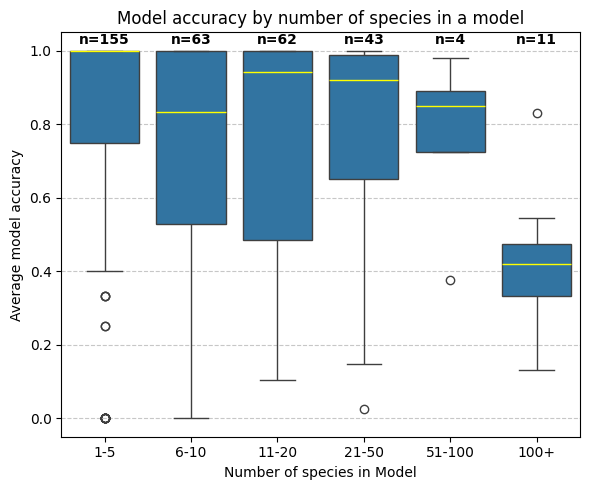

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
results_llama = pd.read_csv('results/biomd_chebi_rag_meta-llama_default.csv')
# Group models by number of species and calculate accuracy statistics
model_species_count = results_llama.groupby('model').size().reset_index(name='species_count')
model_accuracy = results_llama.groupby('model')['accuracy'].mean().reset_index()

# Merge the two dataframes
model_stats = pd.merge(model_species_count, model_accuracy, on='model')

# Create bins for species count to make the box plot more readable
bins = [0, 5, 10, 20, 50, 100, 1000]
labels = ['1-5', '6-10', '11-20', '21-50', '51-100', '100+']
model_stats['species_count_bin'] = pd.cut(model_stats['species_count'], bins=bins, labels=labels)

# Count number of models in each bin
bin_counts = model_stats['species_count_bin'].value_counts().reindex(labels, fill_value=0)

# Create the box plot
plt.figure(figsize=(6, 5))
ax = sns.boxplot(x='species_count_bin', y='accuracy', data=model_stats, medianprops={"color": "yellow", "linewidth": 1})

# Add counts above each box
for i, label in enumerate(labels):
    count = bin_counts[label]
    ax.text(i, 1.01, f'n={count}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.title('Model accuracy by number of species in a model')
plt.xlabel('Number of species in Model')
plt.ylabel('Average model accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.savefig(os.path.join(output_dir, 'accuracy_by_species_count.png'), dpi=300, bbox_inches='tight')
plt.show()

In [8]:
# fix display name handling
ref_df = pd.read_csv('/Users/luna/Desktop/CRBM/AMAS_proj/Results/biomd_species_accuracy_AMAS.csv')
df = pd.read_csv('/Users/luna/Desktop/CRBM/AMAS_proj/AAAIM/tests/results/biomd_chebi_rag_meta-llama_default.csv')

# Replace 'display_name' in df with 'species_name' from ref_df using 'model' and 'species_id' as keys
df = df.merge(ref_df[['model', 'species_id', 'species_name']], on=['model', 'species_id'], how='left', suffixes=('', '_ref'))
df['display_name'] = df['species_name']
df = df.drop(columns=['species_name'])
df.to_csv('/Users/luna/Desktop/CRBM/AMAS_proj/AAAIM/tests/results/biomd_chebi_rag_meta-llama_default_display_names.csv', index=False)

# LLM synergy

In [3]:
from utils.evaluation import evaluate_llm_synergy

# Compare multiple LLM results
synergy_df = evaluate_llm_synergy(
    'results/biomd_chebi_rag_meta-llama_top3.csv',
    'results/biomd_chebi_rag_gpt-4.1-nano_default.csv',
    'results/biomd_chebi_rag_llama-4_top3.csv',
    output_file='llm_synergy_analysis.csv'
)

Analyzing synergy between 3 LLMs: biomd_chebi_rag_meta-llama_top3, biomd_chebi_rag_gpt-4.1-nano_default, biomd_chebi_rag_llama-4_top3
Analysis level: model
Saved synergy analysis to llm_synergy_analysis.csv

=== LLM SYNERGY ANALYSIS SUMMARY (PER-MODEL) ===
Total models analyzed: 340
Average synergy gains:
  Recall: -0.041
  Precision: -0.478
  Accuracy: 0.120

Top 100 models with highest synergy potential (recall):
  BIOMD0000000198.xml (gain: 0.900)
  BIOMD0000000399.xml (gain: 0.684)
  BIOMD0000000400.xml (gain: 0.667)
  BIOMD0000000467.xml (gain: 0.636)
  BIOMD0000000638.xml (gain: 0.625)
  BIOMD0000000478.xml (gain: 0.579)
  BIOMD0000000474.xml (gain: 0.561)
  BIOMD0000000635.xml (gain: 0.549)
  BIOMD0000000552.xml (gain: 0.500)
  BIOMD0000000498.xml (gain: 0.500)
  BIOMD0000000429.xml (gain: 0.500)
  BIOMD0000000183.xml (gain: 0.484)
  BIOMD0000000452.xml (gain: 0.464)
  BIOMD0000000576.xml (gain: 0.450)
  BIOMD0000000088.xml (gain: 0.449)
  BIOMD0000000205.xml (gain: 0.444)
  BIO

# Save filtered results

In [17]:
print_evaluation_results("/Users/luna/Desktop/CRBM/AMAS_proj/AAAIM/tests/results/biomd_chebi_rag_llama-3_top10_prompt_adjusted.csv", ref_results_csv=None)

Showing all results
Number of models assessed: 340
Number of models with predictions: 338
Number of annotations evaluated: 10771
Average accuracy (per model): 0.81
Ave. recall (formula): 0.80
Ave. precision (formula): 0.19
Ave. recall (exact): 0.75
Ave. precision (exact): 0.08
Average accuracy (per species): 0.40
Ave. recall (formula, per species): 0.40
Ave. precision (formula, per species): 0.10
Ave. recall (exact, per species): 0.32
Ave. precision (exact, per species): 0.04
Ave. total time (per model): 4.54
Ave. total time (per element, per model): 0.14
Ave. LLM time (per model): 4.05
Ave. LLM time (per element, per model): 0.13
Average number of predictions per species: 9.23


In [16]:
results_xlsx = "/Users/luna/Desktop/CRBM/AMAS_proj/AAAIM/tests/results/biomd_chebi_rag_llama-3_top10_prompt_adjusted_review.xlsx"
ref_results_csv = "/Users/luna/Desktop/CRBM/AMAS_proj/Results/biomd_species_accuracy_AMAS.csv"
df = pd.read_excel(results_xlsx)

# Filter by reference results
ref_df = pd.read_csv(ref_results_csv)
ref_pairs = set(zip(ref_df['model'], ref_df['species_id']))
mask = df.apply(lambda row: (row['model'], row['species_id']) in ref_pairs, axis=1)
df = df[mask]

print(f"Filtered results to {len(df)} entries that exist in reference: {ref_results_csv}")

Filtered results to 9650 entries that exist in reference: /Users/luna/Desktop/CRBM/AMAS_proj/Results/biomd_species_accuracy_AMAS.csv


In [ ]:
df.to_excel('results/biomd_chebi_rag_llama-3_top10_prompt_adjusted_is+isVersionOf_review.xlsx', index=False)